### 5. Pandas 시각화

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

- Pandas의 시리즈나 데이터프레임은 plot이라는 시각화 메서드를 내장하고 있다. 
    -  plot은 matplotlib를 내부에서 임포트하여 사용한다.

- Line graph

In [2]:
np.random.seed(2023)
df=pd.DataFrame(np.random.randn(100,3),columns=list('ABC'), # rand는 0~1 randn은 음수포함
                index=pd.date_range('2023-04-01',periods=100)).cumsum()
df.head()

,A,B,C
2023-04-01,0.711674,-0.324485,-1.001871
2023-04-02,0.947924,-0.426645,-2.143163
2023-04-03,3.602332,1.013960,-2.044261
2023-04-04,0.480799,-0.062561,-2.369943
2023-04-05,-0.554698,-0.488882,-3.399304


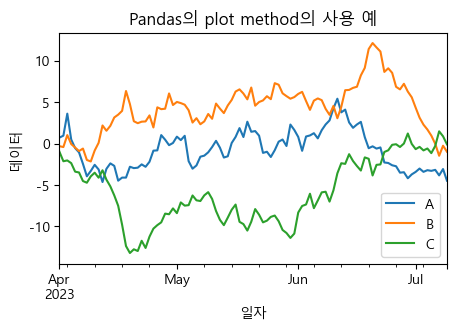

In [3]:
df.plot(figsize=(5,3))   # dafault가 line graph
plt.title('Pandas의 plot method의 사용 예')
plt.xlabel('일자'),plt.ylabel('데이터')
plt.show()

- Bar chart

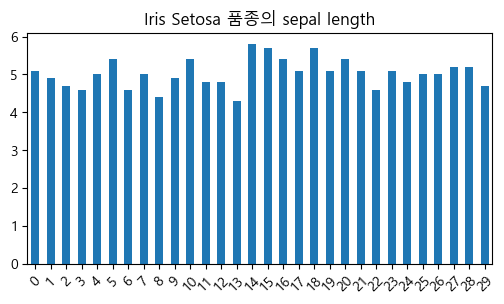

In [4]:
iris = sns.load_dataset('iris')

iris.sepal_length[:30].plot(kind='bar',rot=45, figsize=(6,3)) # 이자체가 시리즈가 되엇 /rot45도 기울기
plt.title('Iris Setosa 품종의 sepal length');

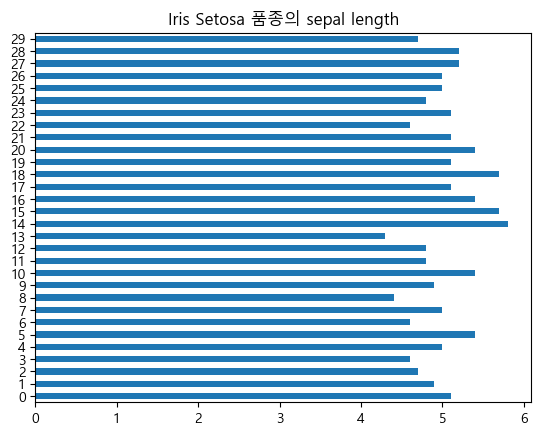

In [5]:
# plot을 barh로
iris.sepal_length[:30].plot(kind='barh') 
plt.title('Iris Setosa 품종의 sepal length');

In [6]:
df2 = iris.groupby('species').mean()
df2

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


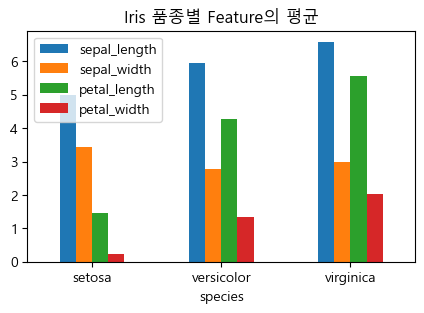

In [7]:
df2.plot.bar(rot=0, figsize=(5,3))
plt.title('Iris 품종별 Feature의 평균');

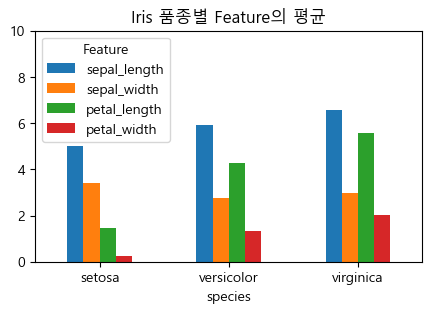

In [8]:
df2.columns.name = 'Feature' # 범례 제목 Feature
df2.plot.bar(rot=0, figsize=(5,3))
plt.ylim(0,10) # 범례공간 만들었고
plt.title('Iris 품종별 Feature의 평균');


- Pie chart

In [9]:
titanic = sns.load_dataset('titanic')

# 시리즈로
s = titanic['class'].value_counts()
s

class
Third     491
First     216
Second    184
Name: count, dtype: int64

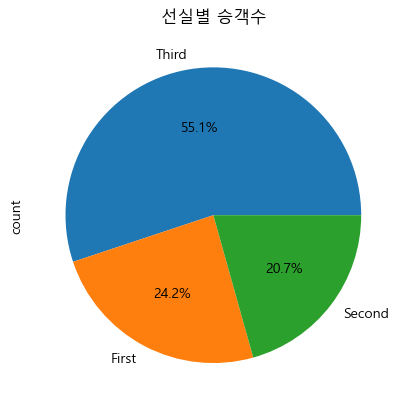

In [10]:
#시리즈라 plot메서드가 있음
s.plot.pie(autopct='%.1f%%')    # 소숫점 1자리 백분율로
plt.title('선실별 승객수');

- histogram .hist(), kernel density .kde()

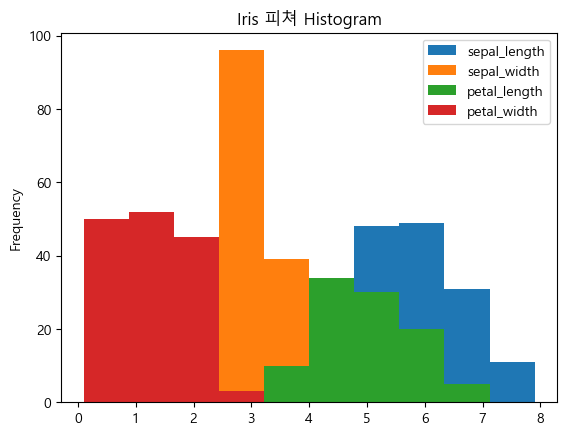

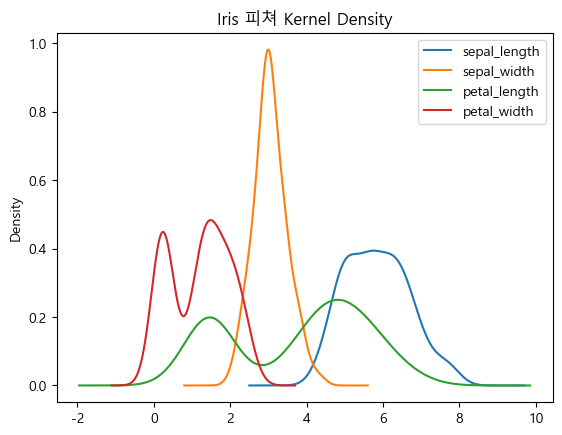

In [13]:
iris.plot.hist()
plt.title('Iris 피쳐 Histogram')
iris.plot.kde() # scipy 모듈 설치
plt.title("Iris 피쳐 Kernel Density") 
plt.show()

- box plot

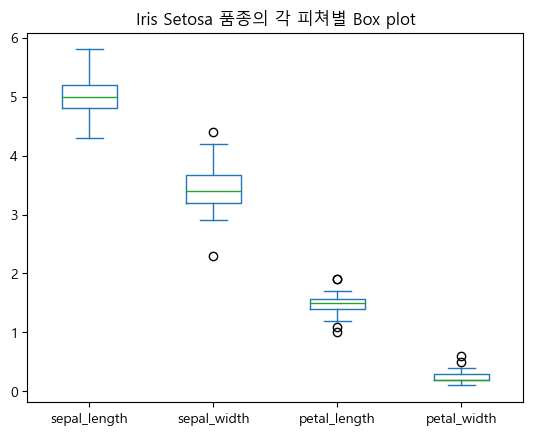

In [15]:
iris[iris.species == 'setosa'].plot.box()
plt.title('Iris Setosa 품종의 각 피쳐별 Box plot');

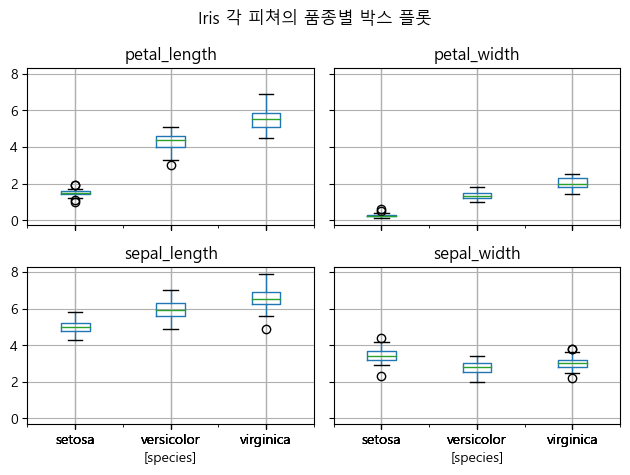

In [19]:
iris.boxplot(by='species')
plt.tight_layout() # layout괄호안에 pad=3, h_pad=1 padding줄수있나봄
plt.suptitle('Iris 각 피쳐의 품종별 박스 플롯'); # suptitle로 안주고 그냥 title로 주면 sepal_width자리에 이 제목이 들어감